In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("merged_data.csv", parse_dates=["date"])
data.set_index("date", inplace=True)
data.dropna()

,LT_imb_MW,LT_mfrr_SA_up_activ,LT_mfrr_SA_down_activ,10YLT-1001A0008Q_DA_eurmwh,temperature_2m,temperature_2m_previous_day1,direct_normal_irradiance_instant,direct_normal_irradiance_instant_previous_day1,shortwave_radiation,shortwave_radiation_previous_day1,...,wind_speed_80m_previous_day1,wind_direction_80m,wind_direction_80m_previous_day1,latitude,longitude,temperature_delta,direct_normal_irradiance_delta,shortwave_radiation_delta,wind_speed_80m_delta,wind_direction_80m_delta
date,,,,,,,,,,,,,,,,,,,,,
2025-01-02 01:00:00,3.795,0.0,0.00,3.21,4.4415,3.7415,0.0,0.0,0.0,0.0,...,45.264156,224.00000,223.000000,54.68,25.25,0.70,0.0,0.0,1.403538,1.000000
2025-01-02 01:00:00,3.795,0.0,0.00,3.21,4.7940,3.6940,0.0,0.0,0.0,0.0,...,50.977830,233.05174,233.615550,54.92,23.85,1.10,0.0,0.0,1.726220,-0.563810
2025-01-02 01:00:00,3.795,0.0,0.00,3.21,6.7500,6.1000,0.0,0.0,0.0,0.0,...,60.379196,238.98302,242.671140,55.71,21.14,0.65,0.0,0.0,5.990784,-3.688120
2025-01-02 01:00:00,3.795,0.0,0.00,3.21,5.1130,3.8630,0.0,0.0,0.0,0.0,...,49.392210,239.33818,239.322780,55.91,23.27,1.25,0.0,0.0,9.199380,0.015400
2025-01-02 01:15:00,16.003,0.0,0.00,3.21,4.4415,3.7415,0.0,0.0,0.0,0.0,...,45.264156,224.00000,223.000000,54.68,25.25,0.70,0.0,0.0,1.403538,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09 23:30:00,41.578,0.0,18.75,112.97,6.7630,4.8630,0.0,0.0,0.0,0.0,...,20.140705,114.05735,114.274430,55.91,23.27,1.90,0.0,0.0,1.937012,-0.217080
2025-03-09 23:45:00,38.575,0.0,55.00,112.97,9.7915,7.9915,0.0,0.0,0.0,0.0,...,20.702211,128.00000,120.000000,54.68,25.25,1.80,0.0,0.0,-3.859735,8.000000
2025-03-09 23:45:00,38.575,0.0,55.00,112.97,7.1940,4.9440,0.0,0.0,0.0,0.0,...,14.689589,108.82480,107.102810,54.92,23.85,2.25,0.0,0.0,2.045571,1.721990


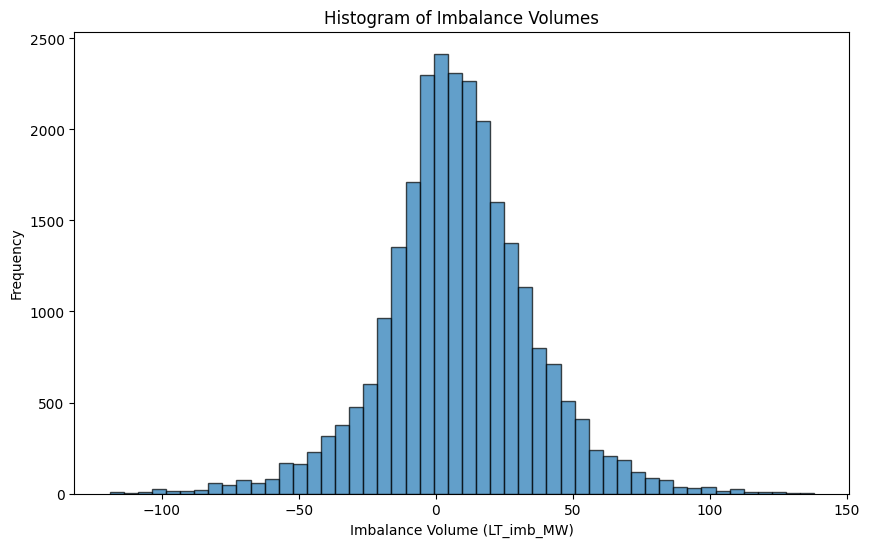

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(data['LT_imb_MW'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Imbalance Volume (LT_imb_MW)")
plt.ylabel("Frequency")
plt.title("Histogram of Imbalance Volumes")
plt.show()

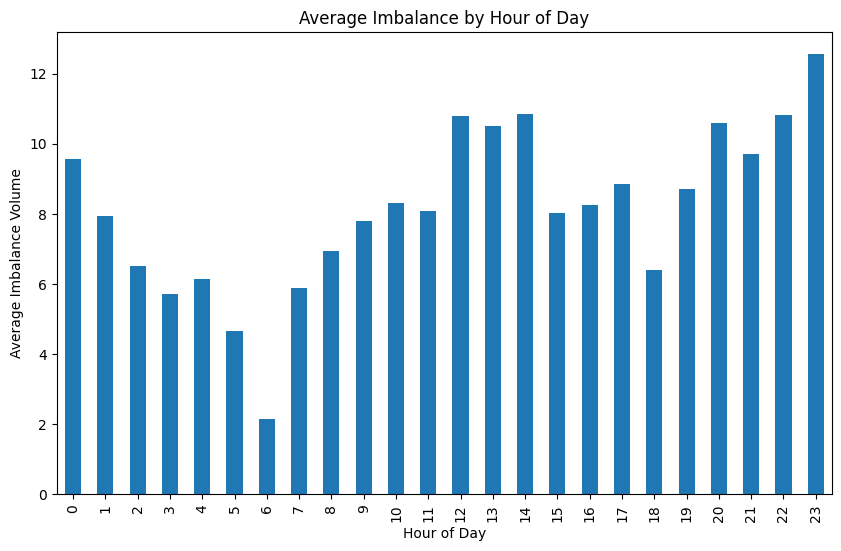

In [25]:
data['hour'] = data.index.hour

hourly_avg = data.groupby('hour')['LT_imb_MW'].mean()


plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("Average Imbalance Volume")
plt.title("Average Imbalance by Hour of Day")
plt.show()

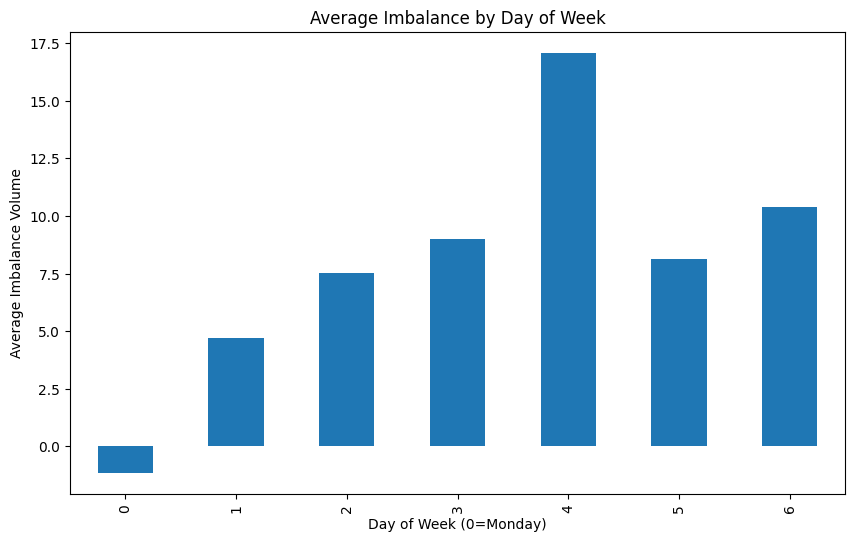

In [26]:
data['day_of_week'] = data.index.dayofweek


daily_avg = data.groupby('day_of_week')['LT_imb_MW'].mean()

plt.figure(figsize=(10, 6))
daily_avg.plot(kind='bar')
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Average Imbalance Volume")
plt.title("Average Imbalance by Day of Week")
plt.show()


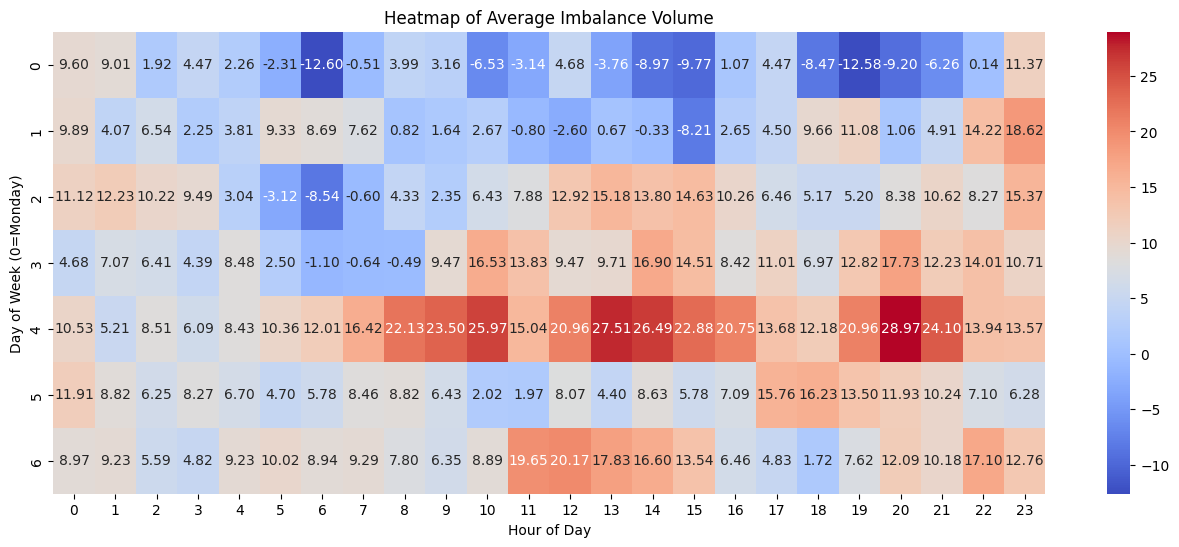

In [27]:
pivot = data.pivot_table(index='day_of_week', columns='hour', values='LT_imb_MW', aggfunc='mean')

plt.figure(figsize=(16, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0=Monday)")
plt.title("Heatmap of Average Imbalance Volume")
plt.show()

In [35]:
data["temperature_2m"] = data["temperature_2m_previous_day1"] + data["temperature_delta"]
data["direct_normal_irradiance_instant"] = data["direct_normal_irradiance_instant_previous_day1"] + data["direct_normal_irradiance_delta"]
data["shortwave_radiation"] = data["shortwave_radiation_previous_day1"] + data["shortwave_radiation_delta"]
data["wind_speed_80m"] = data["wind_speed_80m_previous_day1"] + data["wind_speed_80m_delta"]
data["wind_direction_80m"] = data["wind_direction_80m_previous_day1"] + data["wind_direction_80m_delta"]

weather_cols = [
    'temperature_2m', 
    'direct_normal_irradiance_instant',
    'shortwave_radiation',
    'wind_speed_80m',
    'wind_direction_80m'
]


corr = data[['LT_imb_MW'] + weather_cols].corr()
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
                                  LT_imb_MW  temperature_2m  \
LT_imb_MW                          1.000000        0.105677   
temperature_2m                     0.105677        1.000000   
direct_normal_irradiance_instant   0.163058        0.066104   
shortwave_radiation                0.159743        0.143378   
wind_speed_80m                     0.110751        0.235408   
wind_direction_80m                 0.117050        0.158132   

                                  direct_normal_irradiance_instant  \
LT_imb_MW                                                 0.163058   
temperature_2m                                            0.066104   
direct_normal_irradiance_instant                          1.000000   
shortwave_radiation                                       0.918465   
wind_speed_80m                                           -0.180032   
wind_direction_80m                                       -0.062310   

                                  shortwave_rad

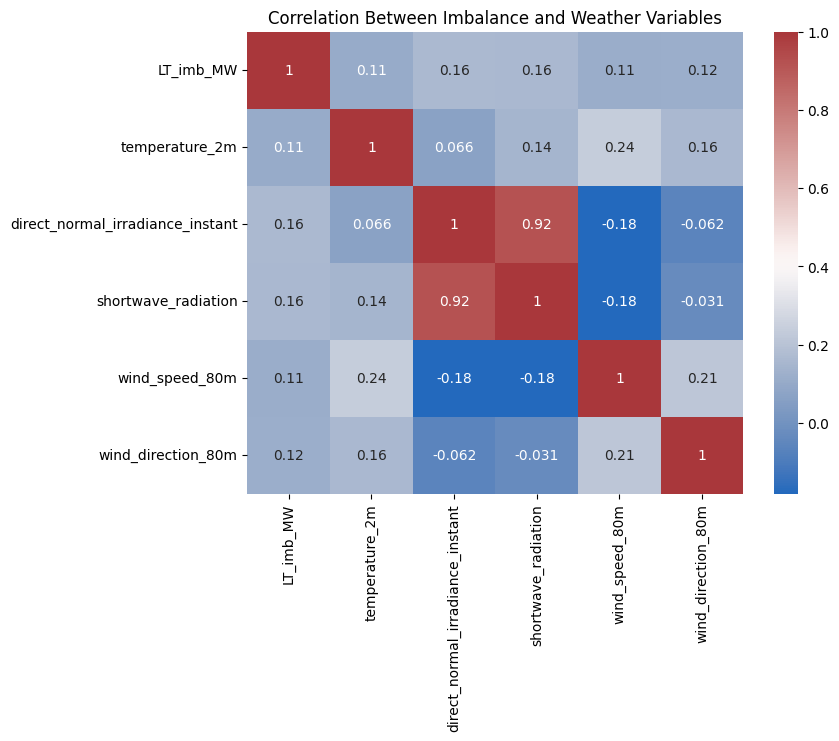

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="vlag")
plt.title("Correlation Between Imbalance and Weather Variables")
plt.show()

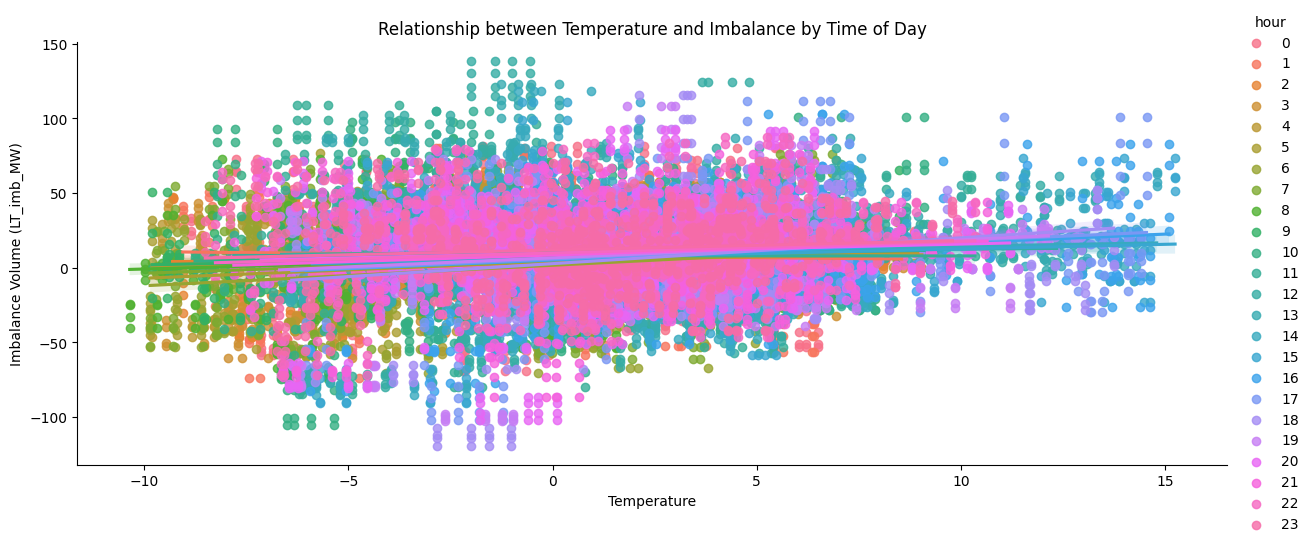

In [63]:
sns.lmplot(x='temperature_2m', y='LT_imb_MW', hue='hour', data=data, aspect=2.5)
plt.xlabel("Temperature")
plt.ylabel("Imbalance Volume (LT_imb_MW)")
plt.title("Relationship between Temperature and Imbalance by Time of Day")
plt.show()

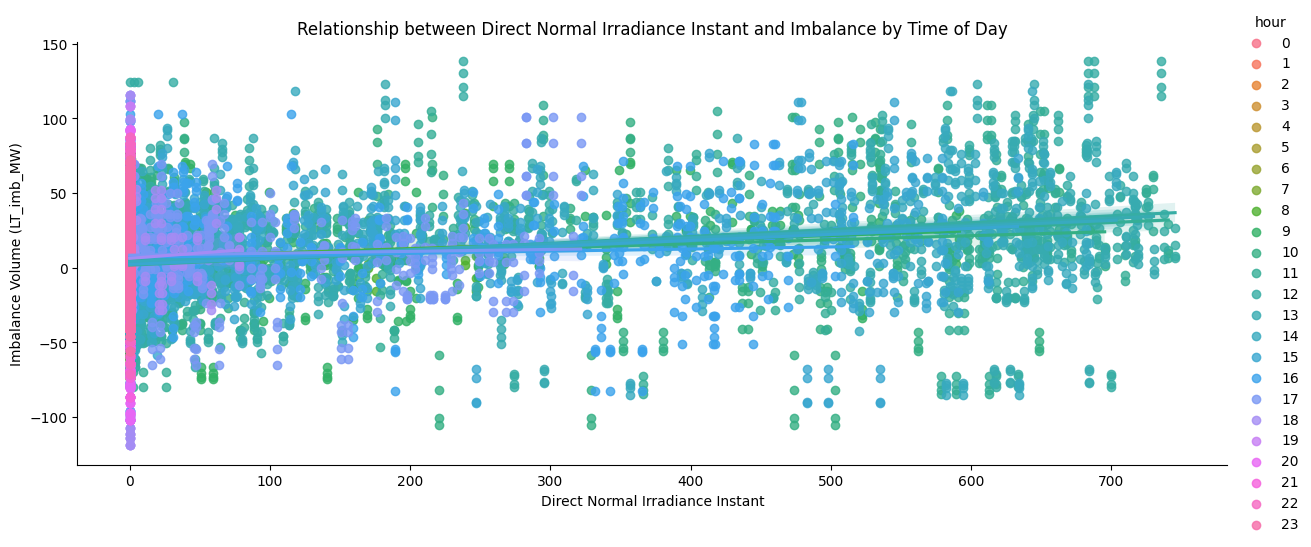

In [58]:
sns.lmplot(x='direct_normal_irradiance_instant', y='LT_imb_MW', hue='hour', data=data, aspect=2.5)
plt.xlabel("Direct Normal Irradiance Instant")
plt.ylabel("Imbalance Volume (LT_imb_MW)")
plt.title("Relationship between Direct Normal Irradiance Instant and Imbalance by Time of Day")
plt.show()

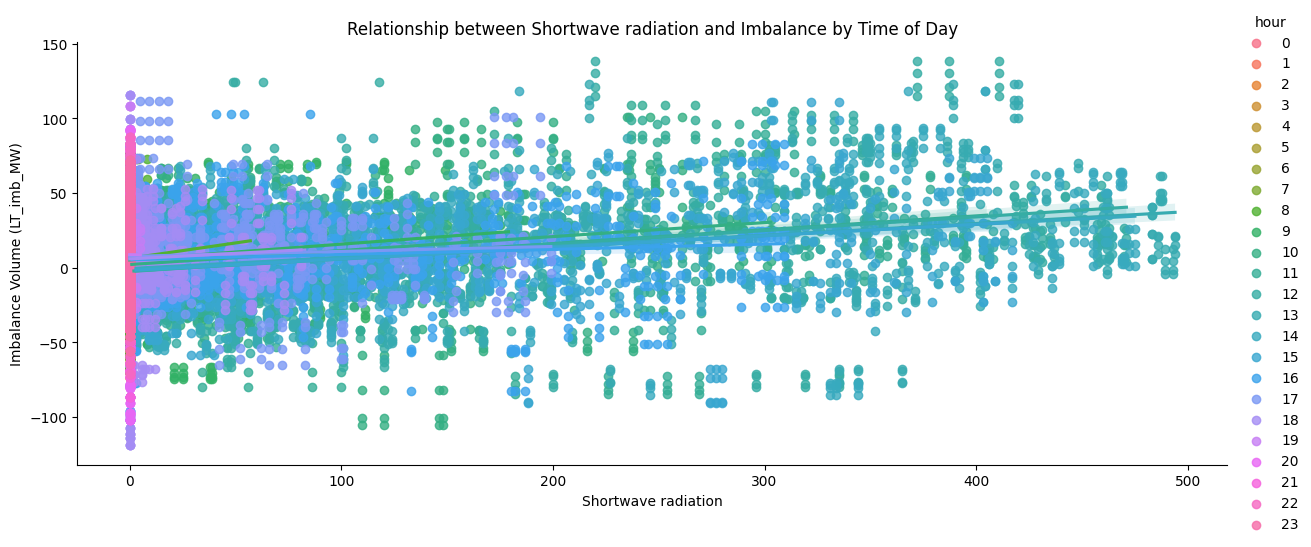

In [57]:
sns.lmplot(x='shortwave_radiation', y='LT_imb_MW', hue='hour', data=data, aspect=2.5)
plt.xlabel("Shortwave radiation")
plt.ylabel("Imbalance Volume (LT_imb_MW)")
plt.title("Relationship between Shortwave radiation and Imbalance by Time of Day")
plt.show()

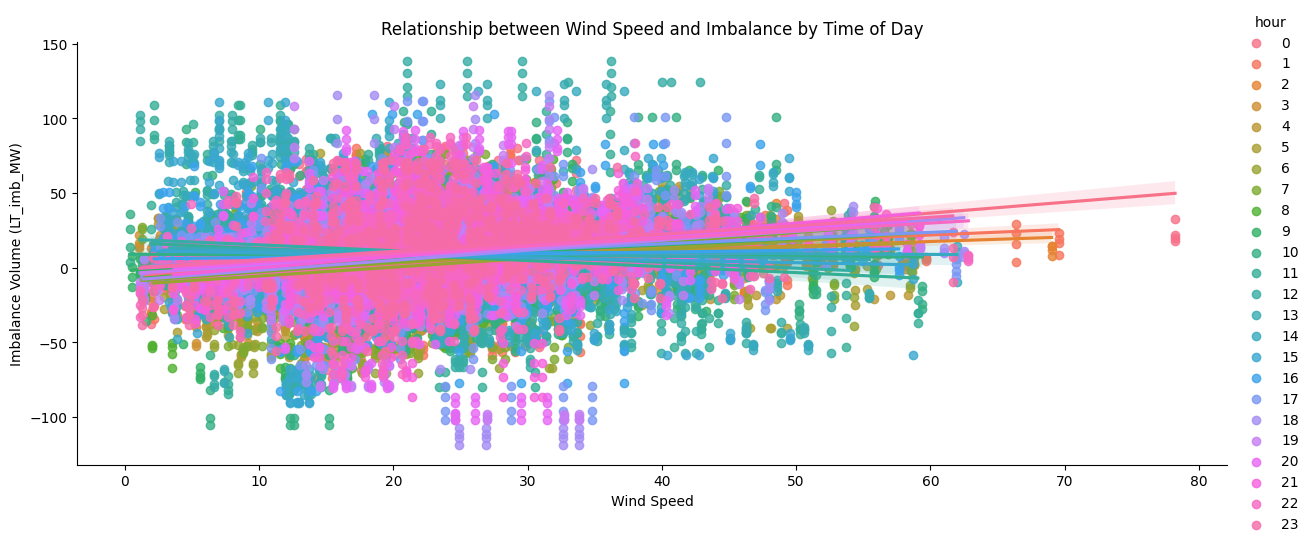

In [60]:
sns.lmplot(x='wind_speed_80m', y='LT_imb_MW', hue='hour', data=data, aspect=2.5)
plt.xlabel("Wind Speed")
plt.ylabel("Imbalance Volume (LT_imb_MW)")
plt.title("Relationship between Wind Speed and Imbalance by Time of Day")
plt.show()

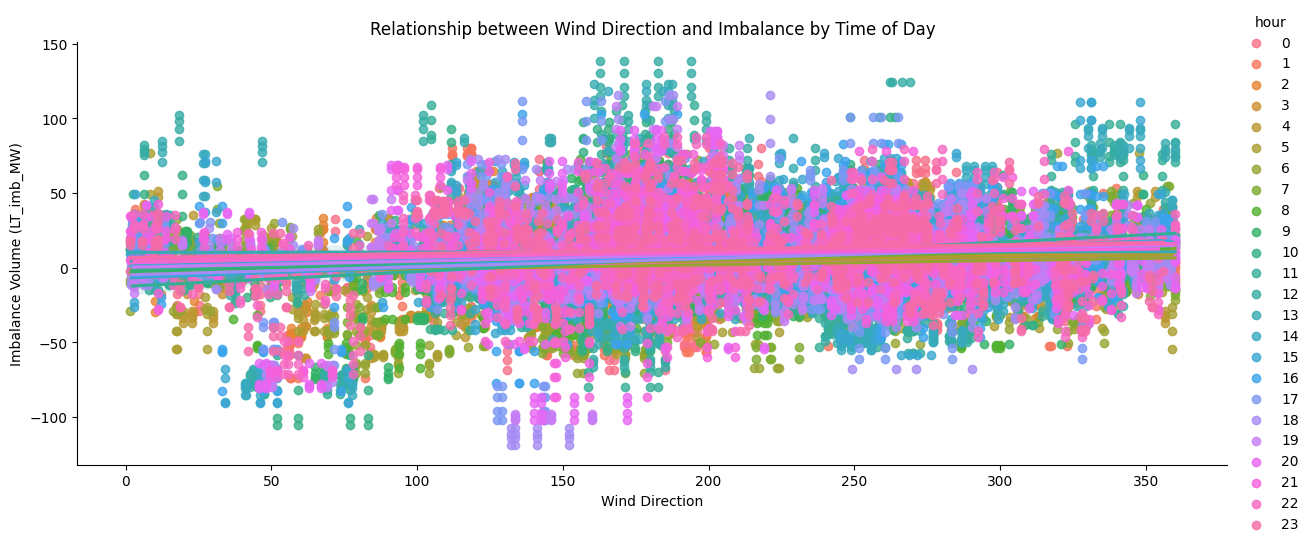

In [61]:
sns.lmplot(x='wind_direction_80m', y='LT_imb_MW', hue='hour', data=data, aspect=2.5)
plt.xlabel("Wind Direction")
plt.ylabel("Imbalance Volume (LT_imb_MW)")
plt.title("Relationship between Wind Direction and Imbalance by Time of Day")
plt.show()